# EDA – Gene Expression on leukemia Dataset

# Exploratory Data Analysis (EDA) on Gene Expression Dataset
**Objective:** To explore gene expression patterns in cancer vs healthy samples and identify key trends and correlations.


## Step 1: Import Libraries
We will use pandas for data handling, matplotlib and seaborn for visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load Dataset
Load the gene expression dataset and display first few rows to understand its structure.


In [2]:
df = pd.read_csv("/content/leukemia_gene_expression.csv")

In [3]:
df.head()

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_992,Gene_993,Gene_994,Gene_995,Gene_996,Gene_997,Gene_998,Gene_999,Gene_1000,Diagnosis
0,1.872701,4.753572,3.659970,2.993292,0.780093,0.779973,0.290418,4.330881,3.005575,3.540363,...,3.473482,1.360726,2.951153,1.804869,0.457910,4.586568,0.684093,4.751187,2.230029,AML
1,0.925665,2.709505,4.364729,3.661124,4.032806,3.293917,3.461383,4.245978,1.248340,2.447125,...,0.794541,3.051126,0.676770,3.756875,3.284776,4.783073,0.344790,0.285274,1.410935,ALL
2,1.308528,1.234894,4.531273,1.247731,1.359749,3.796991,2.248699,3.883553,0.326831,2.437856,...,4.000017,2.763535,1.982768,0.658575,4.326479,0.786366,1.548939,1.450228,4.357070,ALL
3,3.363515,3.983407,1.252339,3.124370,2.858730,4.164152,4.530435,0.060784,3.370100,0.259179,...,1.055630,3.762342,0.256469,2.462677,2.210535,1.672006,1.972862,2.649703,0.806837,AML
4,2.859979,4.027162,3.800805,0.769500,0.746247,1.340872,1.805374,2.042278,3.398486,0.283402,...,2.867816,1.708206,3.242323,0.342204,4.486987,0.596905,1.639214,4.078727,2.986562,Healthy


## Step 3: Dataset Overview
Check number of rows and columns, data types, and basic statistics for numeric features.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1001 entries, Gene_1 to Diagnosis
dtypes: float64(1000), object(1)
memory usage: 7.6+ MB


In [5]:
df.describe()

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_991,Gene_992,Gene_993,Gene_994,Gene_995,Gene_996,Gene_997,Gene_998,Gene_999,Gene_1000
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.461020,2.458892,2.496761,2.446560,2.491377,2.527801,2.435774,2.618876,2.443282,2.441942,...,2.553098,2.522281,2.552105,2.478679,2.489711,2.548148,2.522839,2.567434,2.478872,2.546984
std,1.451230,1.447928,1.440632,1.417235,1.428170,1.433330,1.411670,1.465466,1.437797,1.434912,...,1.452988,1.435197,1.455468,1.420280,1.461434,1.444594,1.426038,1.422690,1.434569,1.387047
min,0.002041,0.001651,0.003054,0.005673,0.002218,0.010555,0.008005,0.001205,0.000224,0.000587,...,0.004028,0.009849,0.000933,0.002660,0.002248,0.002138,0.017994,0.004082,0.000722,0.007800
25%,1.216545,1.221974,1.259216,1.182899,1.300070,1.268925,1.225172,1.369202,1.228549,1.236820,...,1.262849,1.305888,1.286218,1.249985,1.252584,1.325246,1.307290,1.392755,1.260904,1.355971
50%,2.522167,2.455106,2.484981,2.389980,2.462965,2.623118,2.386436,2.728963,2.437465,2.414259,...,2.580654,2.492534,2.628626,2.495482,2.525630,2.629310,2.445500,2.582441,2.372869,2.594424
75%,3.749097,3.675854,3.741525,3.643599,3.685092,3.790408,3.621173,3.929220,3.662384,3.625798,...,3.848650,3.780933,3.819060,3.699430,3.761664,3.816460,3.804005,3.770568,3.681703,3.682511
max,4.990858,4.993805,4.997879,4.994352,4.990726,4.999631,4.998162,4.999200,4.995948,4.996077,...,4.997490,4.999408,4.992949,4.982712,4.982529,4.974369,4.998806,4.998193,4.996389,4.996700


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene_1,1000.0,2.461020,1.451230,0.002041,1.216545,2.522167,3.749097,4.990858
Gene_2,1000.0,2.458892,1.447928,0.001651,1.221974,2.455106,3.675854,4.993805
Gene_3,1000.0,2.496761,1.440632,0.003054,1.259216,2.484981,3.741525,4.997879
Gene_4,1000.0,2.446560,1.417235,0.005673,1.182899,2.389980,3.643599,4.994352
Gene_5,1000.0,2.491377,1.428170,0.002218,1.300070,2.462965,3.685092,4.990726
...,...,...,...,...,...,...,...,...
Gene_996,1000.0,2.548148,1.444594,0.002138,1.325246,2.629310,3.816460,4.974369
Gene_997,1000.0,2.522839,1.426038,0.017994,1.307290,2.445500,3.804005,4.998806
Gene_998,1000.0,2.567434,1.422690,0.004082,1.392755,2.582441,3.770568,4.998193
Gene_999,1000.0,2.478872,1.434569,0.000722,1.260904,2.372869,3.681703,4.996389


In [7]:
df.shape

(1000, 1001)

## Step 4: Check Missing Values & Duplicates
Identify missing values and duplicates to clean the dataset.


In [8]:
print(df.isnull().sum())

Gene_1       0
Gene_2       0
Gene_3       0
Gene_4       0
Gene_5       0
            ..
Gene_997     0
Gene_998     0
Gene_999     0
Gene_1000    0
Diagnosis    0
Length: 1001, dtype: int64


In [9]:
print(df.duplicated().sum())

0


In [10]:
# Drop missing or duplicate rows
df = df.dropna()
df = df.drop_duplicates()

## Step 5: Class Distribution
Check the number of samples in each class (Cancer vs Healthy) to understand dataset balance.


In [12]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
AML,409
ALL,380
Healthy,211


## Step 6: Gene Expression Distribution
Visualize the distribution of top 5 genes to see how expression levels vary.


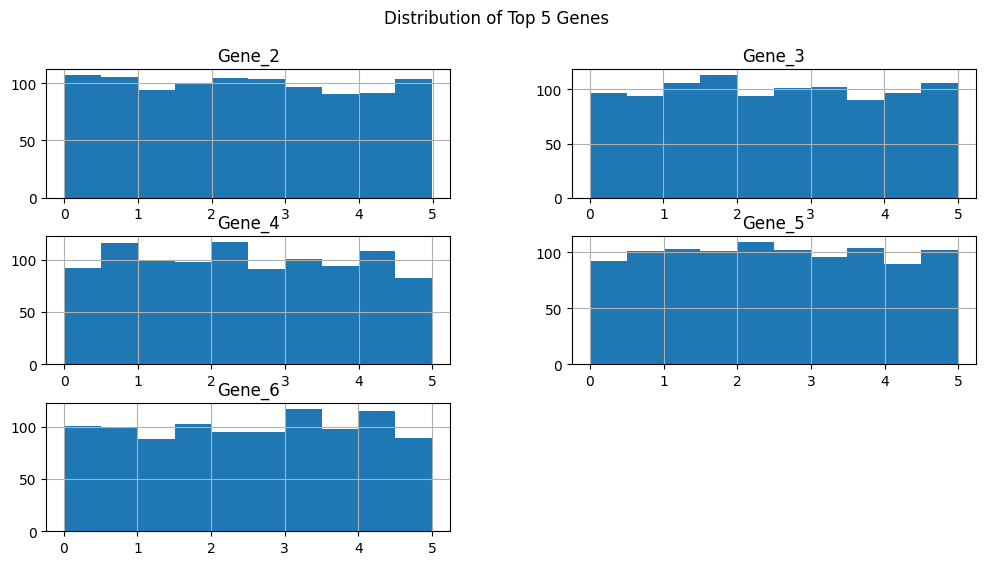

In [15]:
genes = df.columns[1:6]
df[genes].hist(figsize=(12,6))
plt.suptitle("Distribution of Top 5 Genes")
plt.show()

## Step 7: Gene-Gene Correlation
Visualize correlation between genes to identify co-expression patterns.


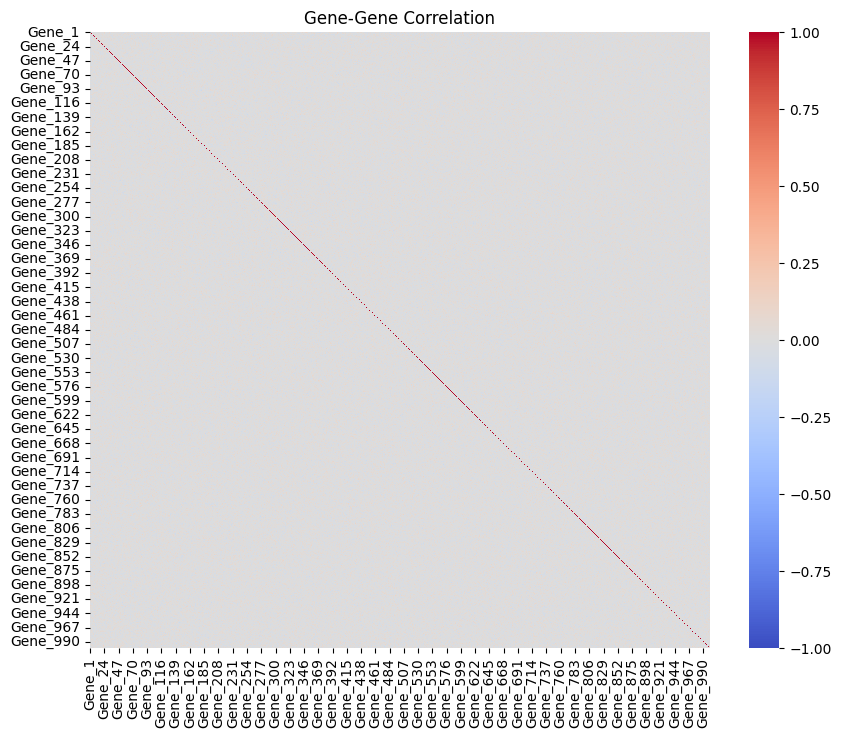

In [17]:
corr = df.iloc[:,:-1].corr() # Exclude the last column (Diagnosis) from correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Gene-Gene Correlation")
plt.show()

## Step 8: Class-wise Gene Expression
Compare expression levels of a gene across classes using a boxplot.


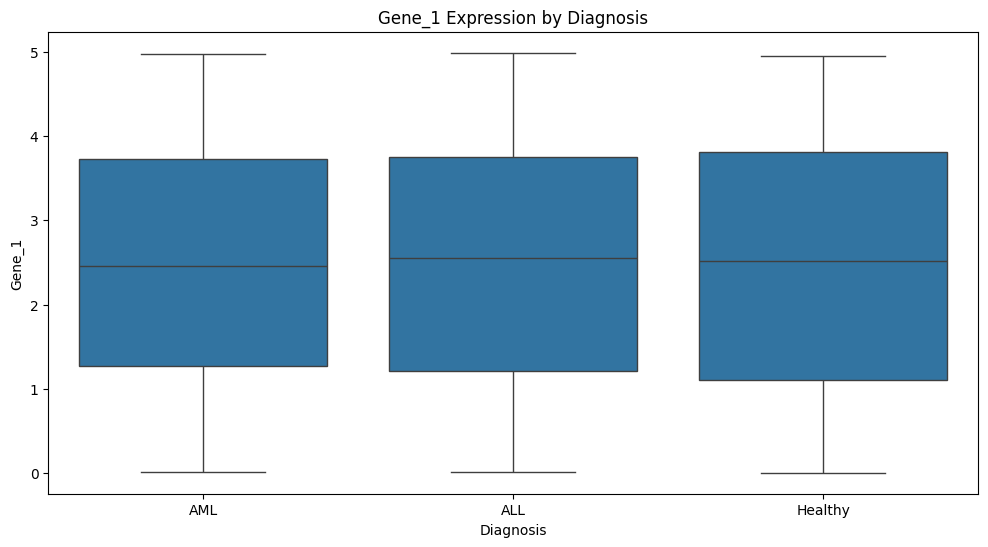

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Diagnosis', y='Gene_1', data=df)
plt.title("Gene_1 Expression by Diagnosis")
plt.show()

## Step 9: PCA for Dimensionality Reduction
Use PCA to reduce high-dimensional gene expression data to 2 components for visualization.


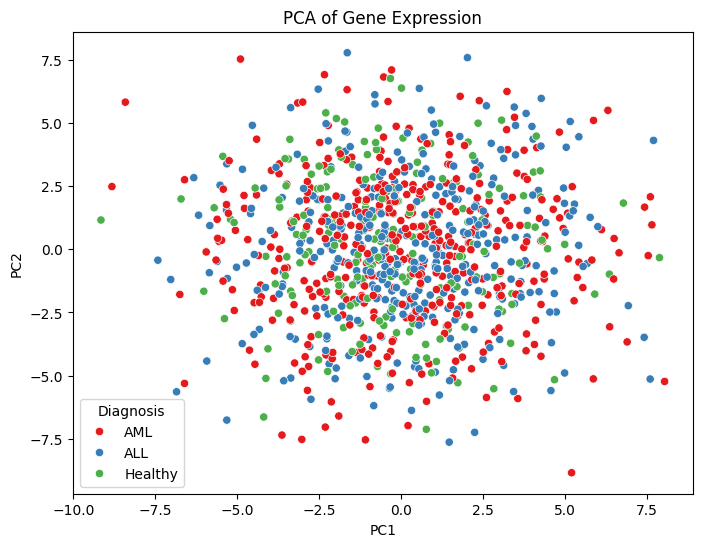

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df.iloc[:,:-1])  # Exclude 'Diagnosis' column

pca_df = pd.DataFrame(data=components, columns=['PC1','PC2'])
pca_df['Diagnosis'] = df['Diagnosis']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='Set1')
plt.title("PCA of Gene Expression")
plt.show()

## Step 10: Insights
# Total Dataset Size: The dataset contains 1000 rows and 1001 columns.
# Total AML Samples: There are 409 samples diagnosed with Acute Myeloid Leukemia (AML).
# Total ALL Samples: There are 380 samples diagnosed with Acute Lymphoblastic Leukemia (ALL).
# Total Healthy Samples: There are 211 healthy samples.
Regarding the correlation, a heatmap of gene-gene correlation was generated. This heatmap visually represents the linear relationships between different gene expression levels. Areas with warmer colors (e.g., red) indicate a positive correlation, while cooler colors (e.g., blue) indicate a negative correlation. This helps to identify groups of genes that tend to be expressed together or inversely.


